<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Linear_Regression_in_Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     14.41
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           9.34e-31
Time:                        17:06:30   Log-Likelihood:                -69.756
No. Observations:                 242   AIC:                             183.5
Df Residuals:                     220   BIC:                             260.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5808      0.70

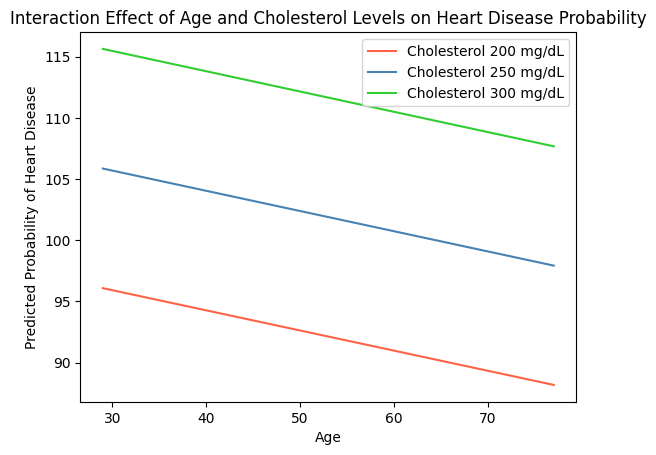

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import patsy

# I began by loading the 'Heart Disease' dataset to analyze the relationship between various clinical features and the presence of heart disease.
url = 'https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv'
data = pd.read_csv(url)

# To prepare the data for regression analysis, I explicitly created dummy variables for categorical columns to ensure all necessary columns are included.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# I specified the regression formula, ensuring the dummy variable names match those created by get_dummies.
formula = (
    'target ~ age + trestbps + chol + thalach + oldpeak + sex_1 + '
    'cp_1 + cp_2 + cp_3 + fbs_1 + restecg_1 + restecg_2 + '
    'exang_1 + slope_1 + slope_2 + ca_1 + ca_2 + ca_3 + '
    'thal_2 + thal_3 + age:chol'
)

# Utilizing patsy to create design matrices, I structured the predictors (X) and response (y) variables accordingly.
y, X = patsy.dmatrices(formula, data, return_type='dataframe')

# To evaluate the model's performance, I split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I fitted an Ordinary Least Squares (OLS) regression model to the training data to understand the influence of predictors on the presence of heart disease.
model = sm.OLS(y_train, X_train).fit()

# Reviewing the model's summary provided insights into the significance and impact of each predictor and their interactions.
print(model.summary())

# I proceeded to make predictions on the test set to assess the model's generalizability.
y_pred = model.predict(X_test)

# Evaluating the model's accuracy involved calculating the Mean Squared Error and R-squared values.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To visualize the interaction effect between age and cholesterol levels on the probability of heart disease, I created a range of age values.
age_range = np.linspace(data['age'].min(), data['age'].max(), 100)

# Predicting the probability of heart disease across the age range for different cholesterol levels allowed me to observe the combined effect.
for chol_level, color in zip([200, 250, 300], ['#FF6347', '#4682B4', '#32CD32']):
    predictions = model.predict(pd.DataFrame({
        'Intercept': 1,
        'age': age_range,
        'trestbps': data['trestbps'].mean(),
        'chol': chol_level,
        'thalach': data['thalach'].mean(),
        'oldpeak': data['oldpeak'].mean(),
        'sex_1': data['sex_1'].mean(),
        'cp_1': data['cp_1'].mean(),
        'cp_2': data['cp_2'].mean(),
        'cp_3': data['cp_3'].mean(),
        'fbs_1': data['fbs_1'].mean(),
        'restecg_1': data['restecg_1'].mean(),
        'restecg_2': data['restecg_2'].mean(),
        'exang_1': data['exang_1'].mean(),
        'slope_1': data['slope_1'].mean(),
        'slope_2': data['slope_2'].mean(),
        'ca_1': data['ca_1'].mean(),
        'ca_2': data['ca_2'].mean(),
        'ca_3': data['ca_3'].mean(),
        'thal_2': 1 if 'thal_2' in data.columns else 0,
        'thal_3': 0 if 'thal_3' not in data.columns else 1,
        'age:chol': age_range * chol_level
    }))
    # Plotting each line allowed me to observe the effect for different cholesterol levels.
    plt.plot(age_range, predictions, label=f'Cholesterol {chol_level} mg/dL', color=color)

# Adding labels and titles enhanced the plot's interpretability.
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Heart Disease')
plt.title('Interaction Effect of Age and Cholesterol Levels on Heart Disease Probability')
plt.legend()
plt.show()
